Richard Pluta

### Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib import style
from sklearn import preprocessing
from sklearn.manifold import TSNE

# Question 1
In	this	exercise,	you	will	work	with	Census	Income Data	Set	that	you	can	
download	from	the	following	link: <https://archive.ics.uci.edu/ml/datasets/Census+Income>

Once	you	have	downloaded	the	data,	you	will	prepare	a	data	visualization	
report	along	the	lines	of	visualization	done	for	the	Boston	Housing	data.	
Feel	free	to	provide	any	additional	visualization	that might	help	in	better	
understanding	of	the	data.	Write	a	paragraph	about	what	characteristics	
of	the	data	you	see	via	visualization.

In [2]:
headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
    "hours-per-week", "native-country", "prediction"]
data = pd.read_csv("adult.data", names=headers)

In [3]:
data.shape, data.columns

((32561, 15),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'prediction'],
       dtype='object'))

In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


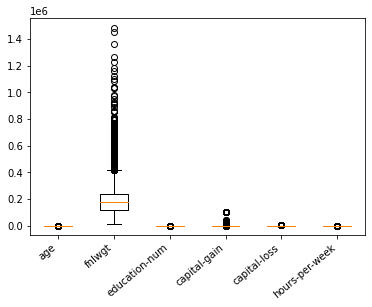

In [5]:
continuousHeaders = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
continuousData = [data[header] for header in continuousHeaders]
plt.boxplot(continuousData)
plt.xticks(np.arange(1, len(continuousData) + 1), continuousHeaders, rotation=40, ha="right")
plt.show()

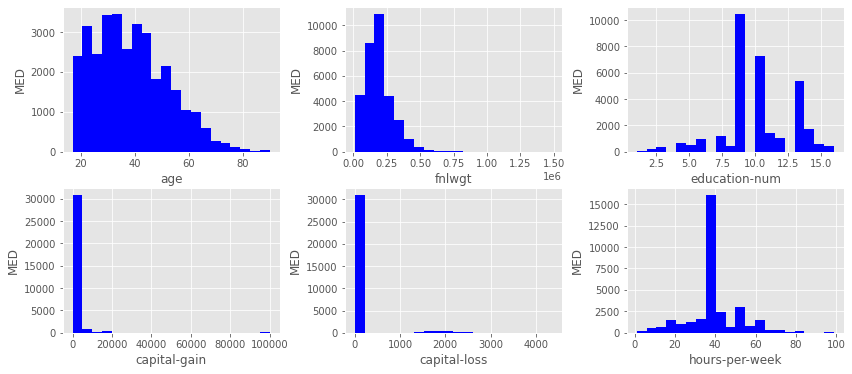

In [6]:
plt.style.use("ggplot")
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
for i in range(1, len(continuousHeaders) + 1):
    plt.subplot(2, 3, i)
    plt.hist(continuousData[i-1], bins=20, color='b')
    plt.xlabel(continuousHeaders[i-1])
    plt.ylabel("MED")
plt.subplots_adjust(wspace=0.30, hspace=0.25)
plt.show()

# Question 2

This	exercise	is	designed	to	make	you	familiar	with	multivariate	normal				
distribution	generation	and	using	the	generated data.	
1. Generate	100	3-dimensional	vectors	that	come	from	a	normal	
distribution	with	mean	vector	as	[1	2	1]t and	3x3	covariance	
matrix	as	[5 0.8	-0.3;	0.8	3 0.6;	-0.3	0.6	4]
2. Make	scatter	plots	of	x1	vs	x2,	x1	vs	x3,	and	x2	vs	x3.	Explain	
whatever	relationships	you	can	gather	from	these	plots.
3. Pick	any	5	pairs of	generated	vectors	and	calculate	the	Euclidean	
and the Mahalanobis	distances	between	those pairs

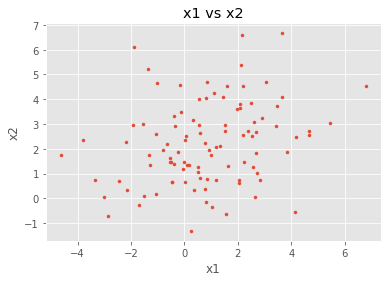

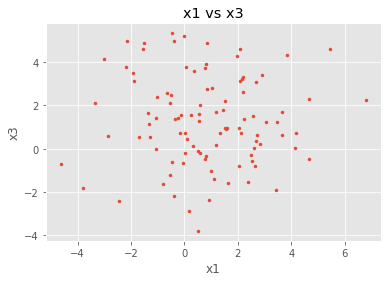

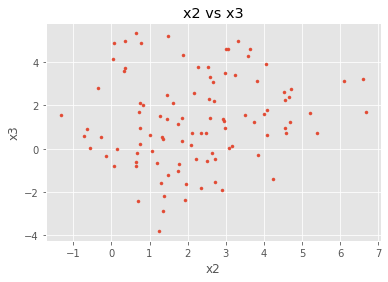

In [7]:
mean = [1, 2, 1]
cov = [
    [5, 0.8, -0.3],
    [0.8, 3, 0.6],
    [-0.3, 0.6, 4]
]

x = np.random.multivariate_normal(mean, cov, 100)
x1, x2, x3 = x.T

plt.scatter(x1, x2, marker=".")
plt.title("x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

plt.scatter(x1, x3, marker=".")
plt.title("x1 vs x3")
plt.xlabel("x1")
plt.ylabel("x3")
plt.show()

plt.scatter(x2, x3, marker=".")
plt.title("x2 vs x3")
plt.xlabel("x2")
plt.ylabel("x3")
plt.show()


It does not appear that there is any strong correlation between any of x1, x2, and x3. 

There does seem to be however a very small positive correlation between x1 and x2, and x2 and x3, while a very small negative correlation between x1 and x3 exists.

In [8]:
for i in range(5):
    index1, index2 = np.random.randint(1, 100), np.random.randint(1, 100)
    y1, y2 = x[index1], x[index2]

    euclidean = distance.euclidean(y1, y2)
    mahalanobis = distance.mahalanobis(y1, y2, np.linalg.inv(cov))
    print(str.format("Pair {}:\n\tEuclidean: {}\n\tMahalanobis: {}", i, euclidean, mahalanobis))

    

Pair 0:
	Euclidean: 1.754964403767681
	Mahalanobis: 0.7900904963638573
Pair 1:
	Euclidean: 7.8542785084105775
	Mahalanobis: 3.5406273912457555
Pair 2:
	Euclidean: 3.389640682047855
	Mahalanobis: 1.646362839639934
Pair 3:
	Euclidean: 5.063181930039343
	Mahalanobis: 2.4949026892368416
Pair 4:
	Euclidean: 7.097191162839146
	Mahalanobis: 3.679977692236872


# Question 3

This exercise is designed to make you familiar with IPUMS USA data source. Go	
to	<http://usa.ipums.org>,	click	on	IPUMS	Registration	and	Login	and	apply	for	
access.	You	will	need	an	account	to	get	data.	You	will	select	1960	1%	sample	
and	use	the	following	variables	to	prepare	your	data	extract:	Marital	status,	
Sex,	Relate,	Age,	and	Employment	status.	You	will	specify	the	csv	format	for	
your	extract.	Once	you	have	downloaded	the	data,	you	will	read	the	data into	
a	data	frame	and	visualize	the	age	distribution	of	working	men	and	the	age	
distribution	of	working	women.	You	will	also	calculate	the	%	of	household	
headed	by	women.


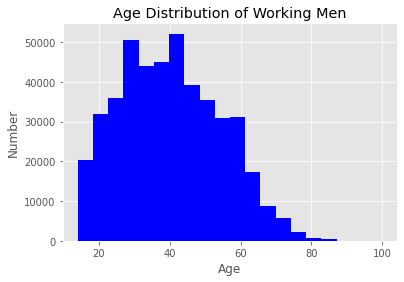

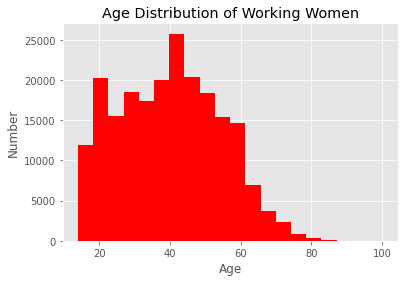

Households headed by women: 24.37512778572889


In [9]:
data = pd.read_csv("usa_00001.csv")

plt.hist(data[(data["SEX"] == 1) & (data["EMPSTAT"] == 1)]["AGE"],bins = 20, color="b")
plt.title("Age Distribution of Working Men")
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

plt.hist(data[(data["SEX"] == 2) & (data["EMPSTAT"] == 1)]["AGE"],bins = 20, color="r")
plt.title("Age Distribution of Working Women")
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

print("Households headed by women: " + str(
    data[(data["SEX"] == 1) & (data["RELATE"] == 1)].size / data.size * 100
))

# Question 4

You	will	perform	this	exercise	using	the PCA-Exercise	
data	posted	on	the	
course	page.

Suppose	we are	interested	in	reducing	the	six-dimensional	records to	two	
dimensions	by	means	of	principal	component	analysis.	List	the	eigenvalues	
and	eigenvectors	obtained	via	PCA.	Determine	the	reduced	representation	
for	all	of	the	records	and plot the	reduced	representation	in	the	form	of	a
scatter	plot.	Reconstruct	the	original	data	and	compute	the	reconstruction	
error.	

In [10]:
data = pd.read_csv("PCAExerciseData.csv").to_numpy()
X = data[:,:-1].astype(int)
X = preprocessing.normalize(X, norm="l2")

mean = np.mean(X, 0)
cov = np.cov(X.T)
w, v = np.linalg.eig(cov)
print("Eigenvalues:", w)
print("Eigenvectors:", v)

Eigenvalues: [4.12131748e-02 1.03626108e-02 3.78810737e-06 7.22517819e-04
 4.27420831e-03 3.41720000e-03]
Eigenvectors: [[-2.35386016e-01 -4.81243069e-01 -5.75357988e-01  3.77441118e-01
  -4.26531029e-01  2.39939996e-01]
 [-8.65121989e-02 -1.35808515e-02  5.81140380e-01  1.23573825e-01
  -7.56747382e-01 -2.58205284e-01]
 [-2.82166799e-01 -3.87816762e-01 -9.82250877e-04  2.08546930e-01
   3.39303909e-01 -7.81895215e-01]
 [-1.50317302e-01 -4.67366205e-01  5.75531652e-01  2.52493506e-01
   3.38346586e-01  4.99505229e-01]
 [ 5.29719889e-01  2.56503232e-01  6.68320154e-04  8.00833606e-01
   8.87401407e-02 -6.62812705e-02]
 [-7.44508233e-01  5.77575753e-01 -9.74726347e-04  3.06085698e-01
   8.90186170e-02  1.02469615e-01]]


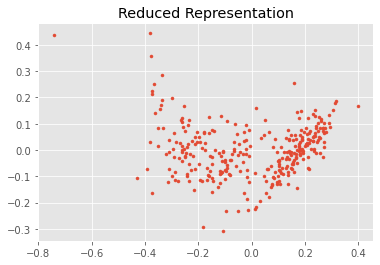

In [11]:
A = np.array([v[:,0], v[:,1]])
Y = np.matmul(A, (X-mean).T)

plt.scatter(Y[0], Y[1], marker=".")
plt.title("Reduced Representation")
plt.show()


In [12]:
Xhat = np.matmul(A.T, Y).T + mean
err = np.sum((X-Xhat)**2) / len(X)

print("Error:"+str(err))

Error:0.008390560325741033


# Question 5

In this exercise, you will apply PCA to the Spoken Arabic Digit Dataset at the
following link:
<https://archive.ics.uci.edu/ml/datasets/Spoken+Arabic+Digit> and	reduce	the	train	data	to	two	dimensions [The	class	labels	are	not	used	in	
PCA].	List	all	eigenvalues	and	make	a	scatter	plot	of	the	transformed	data.	Show	
transformed	data	points	for	any	digit	pair	of	your	choice	in	different	colors	or	
shapes.

In [13]:
rawdata = pd.read_table("Train_Arabic_Digit.txt", delimiter=" ").astype(float)
categoryData = rawdata.notna().to_numpy().astype(bool)
digitIndices = {0: 0}
digit = 1
blocks = 0
for i in range(len(categoryData)):
    if False in categoryData[i]:
        blocks += 1
    
    if blocks >= 660:
        digitIndices[digit] = i
        digit += 1
        blocks = 0

data = rawdata.dropna().to_numpy()

X = preprocessing.normalize(data, norm="l2")

mean = np.mean(X, 0)
cov = np.cov(X.T)
w, v = np.linalg.eig(cov)
print("Eigenvalues: " + str(w))
print("Eigenvectors: " + str(v))

Eigenvalues: [0.25099642 0.09568619 0.05920114 0.03965005 0.02645368 0.02381982
 0.01347961 0.01453371 0.00433683 0.01082354 0.00823997 0.00764936
 0.00633945]
Eigenvectors: [[ 0.83232088  0.17761996 -0.33081102  0.34969484 -0.08739872 -0.08709557
  -0.15106037  0.00240085  0.03245863 -0.02357452  0.02466739  0.06083771
   0.00157466]
 [ 0.27109085  0.28639132  0.89456799  0.08185084  0.06254089  0.14371221
  -0.03273003 -0.05607395  0.01255042 -0.08554081  0.03292545  0.01203326
   0.00738775]
 [-0.31208742  0.70745339 -0.08132578  0.11789449 -0.26727193 -0.41394842
  -0.08311863  0.02600792  0.03647807 -0.28946285 -0.08717562 -0.19610738
   0.00695424]
 [-0.26218989  0.34701607 -0.1719523   0.5047973   0.13686404  0.58984866
   0.11502976 -0.21816343  0.00191102  0.25139886  0.03879772  0.15045552
   0.10780031]
 [-0.16417796 -0.24329104  0.06069082  0.47607122  0.33759503 -0.28389867
   0.00179326  0.21783548  0.06697094 -0.40937205  0.35911423  0.27791442
   0.25146267]
 [-0.086698

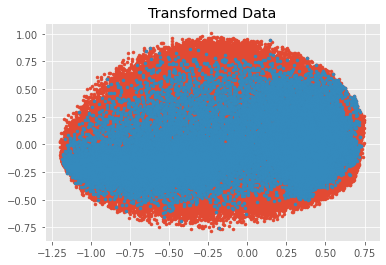

In [14]:
A = np.array([v[:,0], v[:,1]])

Y = np.matmul(A, (X-mean).T)

plt.scatter(Y[0], Y[1], marker=".")
# The digit 0:
plt.scatter(Y[0,:digitIndices[1]], Y[1,:digitIndices[1]], marker=".")
plt.title("Transformed Data")
plt.show()

# Question 6

Repeat	Exercise	#5 using	t-SNE	visualization	method to	visualize	the	entire	
train data	set.	Comment	on	the	results	obtained.

In [15]:
X_10 = TSNE(n_components=2, perplexity=10, n_iter=250, n_iter_without_progress=50, n_jobs=-1).fit_transform(data)

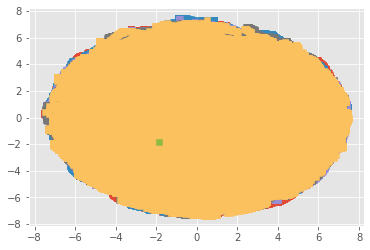

In [16]:
size = X_10.size
block = size // 10
for i in range(10):
    plt.scatter(X_10[i*block:(i+1)*block,0], X_10[i*block:(i+1)*block,1], marker=",")
plt.show()

It appears that this representation is just a blob without any clear distinction between digits. I had to adjust some of the arguments given to the `TSNE()` since it was taking too long to run without them. I believe some of these arguments may have caused the output to look like this.